## STEP-1

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\Jatin\Documents\05-05-InstaCartBasketAnalysis'

In [4]:
#import data frame
df=pd.read_pickle(os.path.join(path,'2 Data','Prepared Data','customers_merged.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,customer,first_name,last_name,gender,state,age,date_joined,total_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
df.shape

(32404859, 33)

## STEP-2

<Axes: >

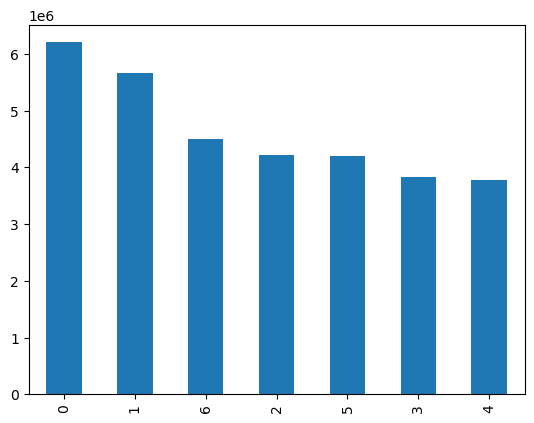

In [9]:
# Create a bar chart
df['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

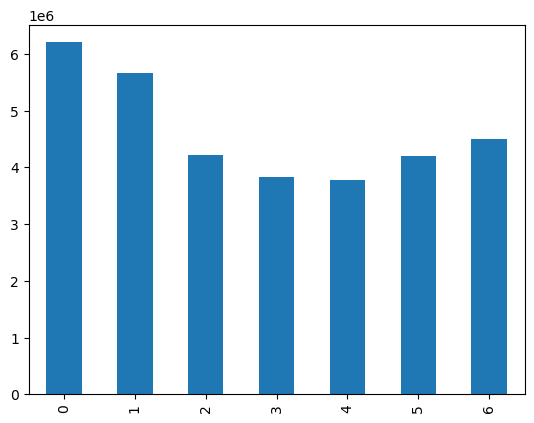

In [10]:
# sort the bar chart in order
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

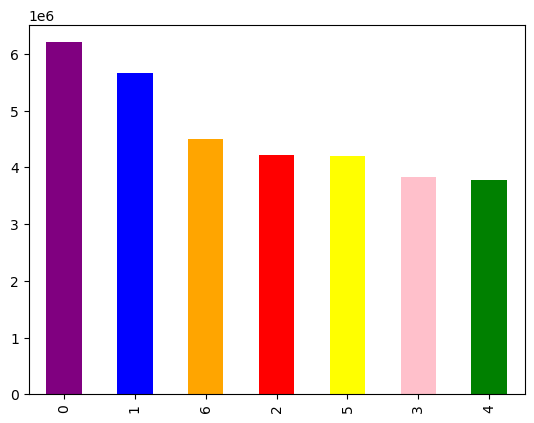

In [12]:
# to add colors
bar=df['orders_day_of_week'].value_counts().plot.bar(color=['purple','blue','orange','red','yellow','pink','green'])

In [13]:
# export the bar chart
bar.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

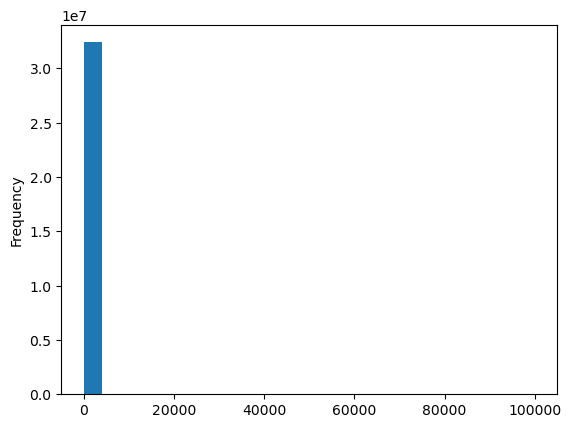

In [14]:
# creating histograms
df['prices'].plot.hist(bins=25)

In [20]:
df['prices'].mean()

11.980225638383438

In [21]:
df['prices'].max()

99999.0

In [22]:
df['prices'].median()

7.4

In [ ]:
# mean is 12 and median is 7. But the maximum value is 99999. To fix it: first check the outliers through scatter plot.
#and then I checked that there are 5127 products whose prices are more than 100. finally marking these values as missing or null.

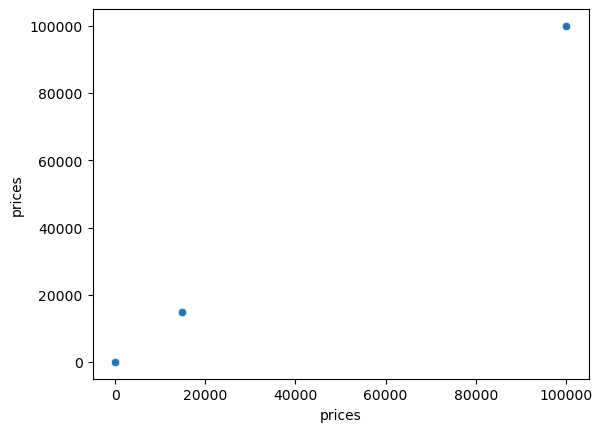

In [24]:
# create a scatterplot
scatter=sns.scatterplot(x='prices',y='prices',data=df)

In [25]:
# checking the products whose price is more than 100
df.loc[df['prices']>100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,customer,first_name,last_name,gender,state,age,date_joined,total_dependants,marital_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [27]:
#marking 5127 values as null
df.loc[df['prices']>100,'prices']=np.nan

In [28]:
df['prices'].max()

25.0

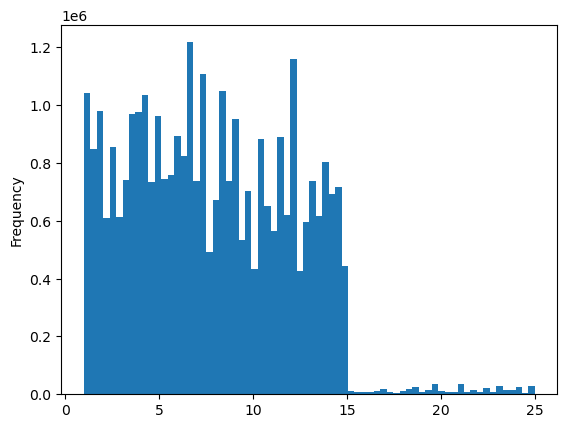

In [29]:
#create a histogram with now bins =70 and 'prices': max is 25
hist=df['prices'].plot.hist(bins=70)

In [30]:
#export histogram
hist.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','hist_prices_70.png'))

In [32]:
#export scatterplot
scatter.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','scatter_prices.png'))

In [34]:
#creating line chart
#creating a list holding true/false valuesto the test np.random.rand()<=0.7
np.random.seed(4)
dev=np.random.rand(len(df))<=0.7


In [35]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [36]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [37]:
# store 70% of the sample in the dataframe big
big=df[dev]

In [38]:
# store 30% of the sample in the dataframe small
small=df[~dev]

In [39]:
# check length of the entire dataframe
len(df)

32404859

In [40]:
#check length of sample subset and adding them together gives the length of entire data frame.
len(big)+len(small)

32404859

In [41]:
df_2=small[['orders_day_of_week','prices']]

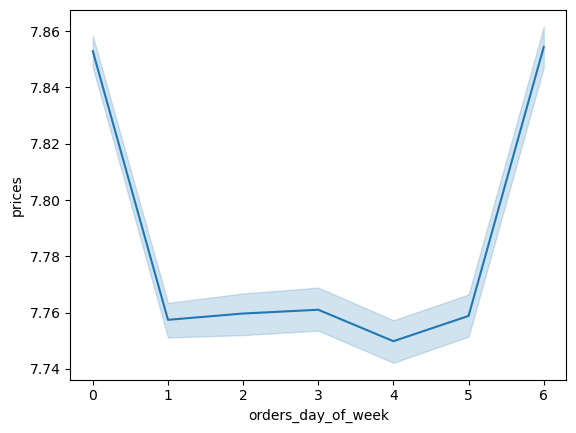

In [42]:
# to create a line chart
line=sns.lineplot(data=df_2,x='orders_day_of_week',y='prices')

In [43]:
# export the line chart
line.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','line_orders_dow.png'))

## STEP-3

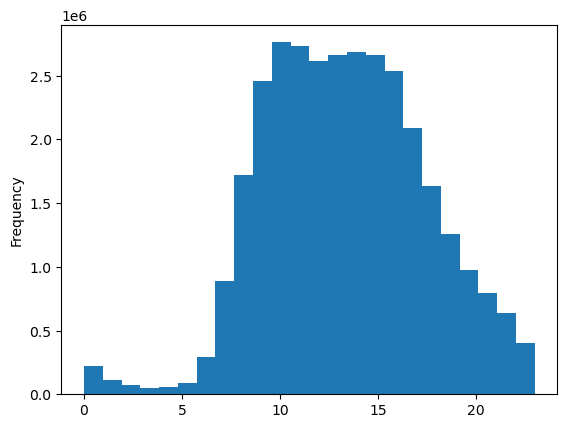

In [46]:
# histogram of 'order_hour_of_day' column
hist_2=df['order_hour_of_day'].plot.hist(bins=24)

In [47]:
# above histogram shows the frequency of shoppers at different hours of the day from 0 to 24 hrs. The most frequency time for 
# shoppers is between 10-17 i.e. 10 am to 5 pm.

In [48]:
# export the above histogram
hist_2.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','hist_orders_hod.png'))

## STEP-4

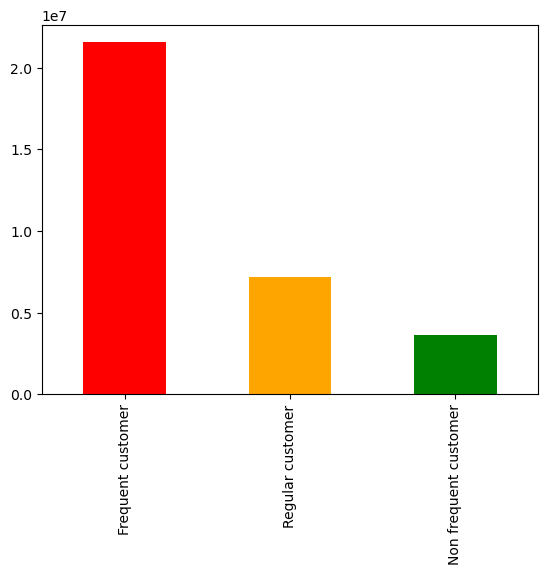

In [52]:
#create a bar chart from the loyal flag column
bar_2=df['customer'].value_counts().plot.bar(color=['red','orange','green'])

In [53]:
# export the above bar chart
bar_2.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','bar_loyalty.png'))

## STEP- 5

In [55]:
# create a small dataframe for the columns that we need to draw line chart
df_3=small[['prices','order_hour_of_day']]

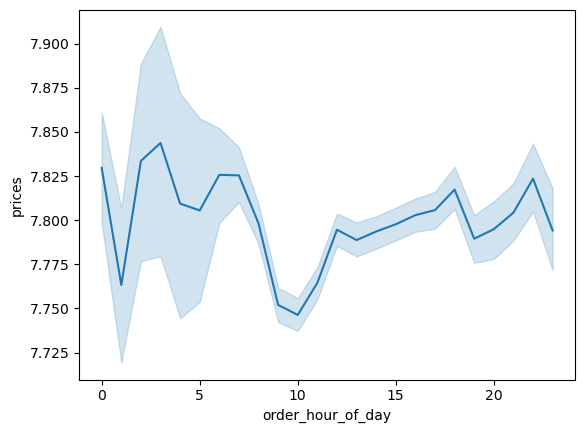

In [56]:
line_2=sns.lineplot(data=df_3,x='order_hour_of_day',y='prices')

In [57]:
# export the above line chart
line_2.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','line_expenditure_hour.png'))

## STEP-6

In [58]:
#create a small dataframe for age and total_dependants columns
df_4=small[['age','total_dependants']]

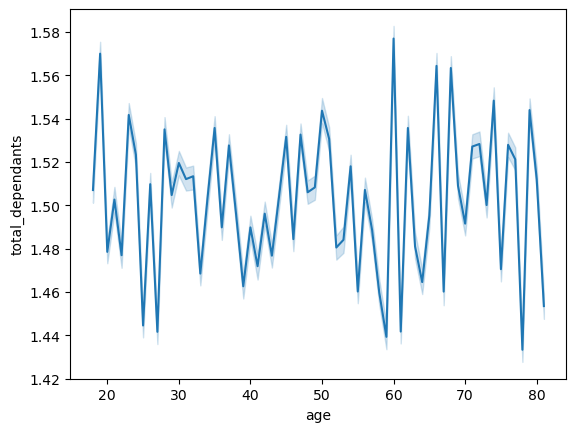

In [59]:
line_3=sns.lineplot(data=df_4,x='age',y='total_dependants')

In [ ]:
# the above line chart has an irregular pattern between age and total_dependants. There is litle to no relationship exist 
#between these two fields.

In [60]:
# export the above line chart
line_3.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','line_age_dependants.png'))

## STEP-7

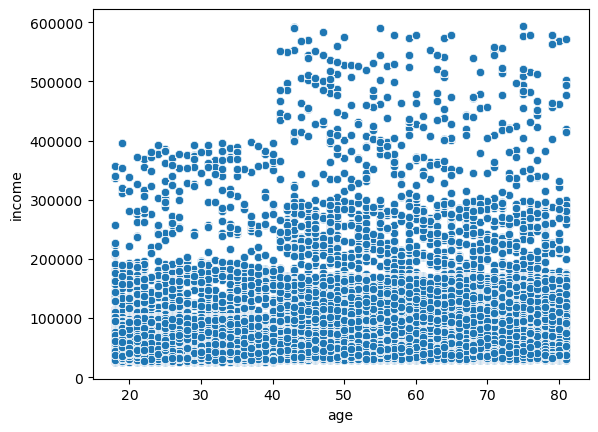

In [61]:
# create a scatterplot between age and income
scatter_2=sns.scatterplot(x='age',y='income',data=df)

In [ ]:
# from the above plot, it is quite clear that majority of all age people earns atleast 200K. But, people from 40 age above, 
# more of population are earning 300K.There are some people in age till 40 who are earning upto 400K and some people in age 
# above 40 are earning upto 600K. This is quite obvious as age increases, people have more experience in their job or may be 
# more source of income.

In [62]:
# export the above chart
scatter_2.figure.savefig(os.path.join(path,'4 Analysis','Visualizations','scatter_age_income.png'))